## Salary_hike -> Build a prediction model for Salary_hike


#### Import necessary libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings
%matplotlib inline

#### Reading the dataset

In [17]:
data = pd.read_csv("Salary_Data.csv")
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


#### Shape of dataset

In [18]:
data.shape

(30, 2)

#### Information of dataset 

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


#### Description of dataset

In [20]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Visualizing the dataset

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


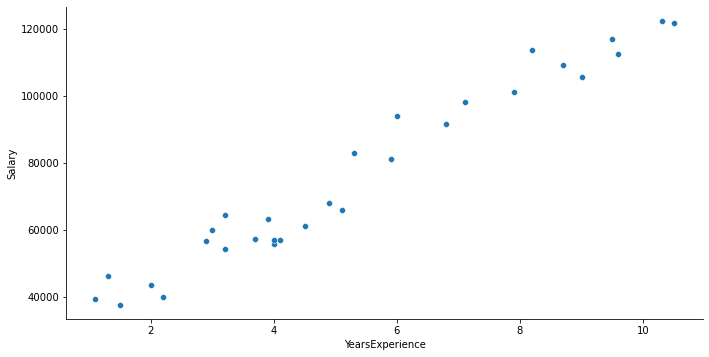

In [21]:
sns.pairplot(data, x_vars = ['YearsExperience'], y_vars = 'Salary', size = 5, aspect = 2, kind = 'scatter')

#### Visualizing the dataset using Heatmap

<AxesSubplot:>

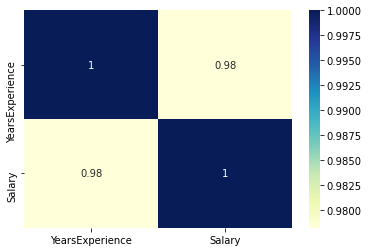

In [22]:
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True)

#### We'll assign YearsExperience as X and Salary as Y

In [23]:
A = data['YearsExperience']
B = data['Salary']

#### Creating Train and Test sets
For this we will import sklearn libraries

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
A_train, A_test, B_train, B_test = train_test_split(A, B, train_size = 0.7 ,test_size = 0.3, random_state = 100)

#### Overview of training dataset

In [26]:
A_train

17     5.3
22     7.9
11     4.0
4      2.2
29    10.5
0      1.1
1      1.3
18     5.9
14     4.5
19     6.0
21     7.1
2      1.5
20     6.8
10     3.9
16     5.1
15     4.9
23     8.2
7      3.2
3      2.0
24     8.7
8      3.2
Name: YearsExperience, dtype: float64

In [27]:
B_train

17     83088.0
22    101302.0
11     55794.0
4      39891.0
29    121872.0
0      39343.0
1      46205.0
18     81363.0
14     61111.0
19     93940.0
21     98273.0
2      37731.0
20     91738.0
10     63218.0
16     66029.0
15     67938.0
23    113812.0
7      54445.0
3      43525.0
24    109431.0
8      64445.0
Name: Salary, dtype: float64

#### Building and training the model
For that we will import statsmodels library.

In [28]:
import statsmodels.api as sm

#### Adding a constant for intercept

In [29]:
A_train_sm = sm.add_constant(A_train)

#### Fitting the regression line using 'OLS'

In [43]:
model = sm.OLS(B_train, A_train_sm).fit()
## Printing the parameters
model.params

const              25202.887786
YearsExperience     9731.203838
dtype: float64

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     352.9
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           9.91e-14
Time:                        10:49:52   Log-Likelihood:                -211.80
No. Observations:                  21   AIC:                             427.6
Df Residuals:                      19   BIC:                             429.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             2.52e+04   2875.387      8.765      0.000    1.92e+04    3.12e+04
YearsExperience  9731.2038    517.993     18.786      0.000    8647.033    1.08e+04
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                1.106
Skew:                           0.219   Prob(JB):                        0.575
Kurtosis:                       1.964   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Visualizing the regression line

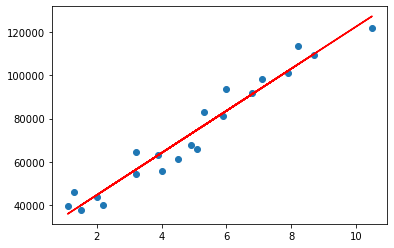

In [32]:
plt.scatter(A_train, B_train)
plt.plot(A_train, 2.52e+04 + 9731.2038 * A_train, 'r')

So, we build a simple linear regression model using training data.

#### Residual Analysis
Error = Actual B value - A predicted value

#### Predicting B_value using training data of A

In [33]:
B_train_pred = model.predict(A_train_sm)

#### Creating residuals from B_train data and B_predicted data

In [34]:
resd = (B_train - B_train_pred)

#### Plotting histogram for residual to check if its normal distribution or not.

C:\Users\D_R\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Residuals')

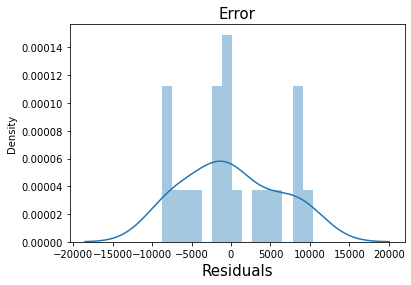

In [35]:
fig = plt.figure()
sns.distplot(resd, bins= 15)
plt.title('Error', fontsize = 15)
plt.xlabel('Residuals', fontsize = 15)

Residuals are following the normal distribution graph with a mean 0.

#### Check if any patterns in the residuals occurs.

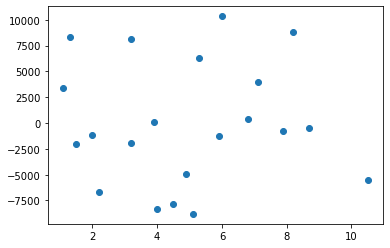

In [36]:
plt.scatter(A_train, resd)

#### Predictions on the Test data

#### Adding a constantto A_test

In [37]:
A_test_sm = sm.add_constant(A_test)

#### Predicting B values corresponding to A_test_sm

In [38]:
B_test_pred = model.predict(A_test_sm)

#### Showing Some Predicting values

In [39]:
B_test_pred

9      61208.341988
26    117649.324249
28    125434.287320
13     65100.823523
5      53423.378917
12     64127.703139
27    118622.444633
25    112783.722330
6      54396.499301
dtype: float64

#### Calculating R-squared values for above predicted values
For that, we will import sklearn.metrics package

In [40]:
from sklearn.metrics import r2_score

In [41]:
r_squared = r2_score(B_test, B_test_pred) 
r_squared

0.962766868547327

R-squared value for training data = 0.949

R-squared value for testing data = 0.962

Since R-squared value of training data and testing data is close, we can conclude that the model is Pretty stable.

#### Visualizing the line on test data

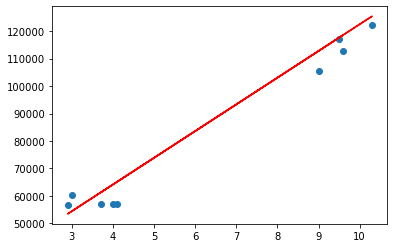

In [42]:
plt.scatter(A_test, B_test)
plt.plot(A_test, B_test_pred, 'r')